In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import math
from IPython.display import clear_output
    
%matplotlib inline 
#plt.set_cmap(cm.get_cmap("Spectral_r"))

In [2]:
# initialize empty graph, colors indicate source and sink nodes, weights start at 0

DG = nx.DiGraph()

DG.add_node(1, pos=(0,0), color='green', name='source')
DG.add_node(2, pos=(0,1), color='grey', name='pass')
DG.add_node(3, pos=(1,0), color='grey', name='pass')
DG.add_node(4, pos=(1,1), color='grey', name='pass')
DG.add_node(5, pos=(2,0), color='grey', name='pass')
DG.add_node(6, pos=(2,1), color='red', name='sink')

DG.add_weighted_edges_from([(1, 2, 0), 
                            (1, 3, 0),
                            (2, 4, 0),
                            (3, 4, 0),
                            (3, 5, 0),
                            (4, 6, 0),
                            (5, 6, 0)])

In [3]:
# add orientation properties

for (u,v) in DG.edges:
    x1 = DG.nodes[u]['pos'][0]
    y1 = DG.nodes[u]['pos'][1]
    
    x2 = DG.nodes[v]['pos'][0]
    y2 = DG.nodes[v]['pos'][1]
    
    if (x1 == x2):
        DG.edges[u,v]["orient"] = "vertical"
    else:
        DG.edges[u,v]["orient"] = "horizontal"
        
#nx.get_edge_attributes(DG,"orient")

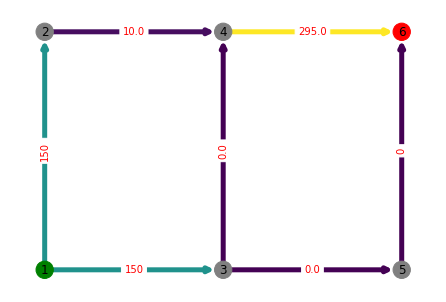

KeyboardInterrupt: 

In [5]:
flowrate = 10
inrate = 15
outrate = 5


for i in range(50):
    if (i % 2 == 0):
        trafficdir = "horizontal"
    else:
        trafficdir = "vertical"

    for node in DG.nodes:
        if DG.nodes[node]["name"] == "source":
            for u,v in DG.out_edges(node):
                edge = DG.edges[u,v]
                if edge['orient'] == trafficdir:
                    update = {(u,v):{"weight": edge['weight'] + inrate}}
                    nx.set_edge_attributes(DG, update)
        
        elif DG.nodes[node]["name"] == "pass":
            passthrough = 0
            for u,v in DG.in_edges(node):
                edge = DG.edges[u,v]
                if edge['orient'] == trafficdir:
                    passthrough = passthrough + min(edge['weight'], flowrate)
                    update = {(u,v):{"weight":  edge['weight'] - passthrough}}
                    nx.set_edge_attributes(DG, update)
            
            pipes = len(DG.out_edges(node))
            passthrough = passthrough / pipes
            for u,v in DG.out_edges(node):
                edge = DG.edges[u,v]
                update = {(u,v):{"weight":  edge['weight'] + passthrough}}
                nx.set_edge_attributes(DG, update)
        
        elif DG.nodes[node]["name"] == "sink":
            for u,v in DG.in_edges(node):
                edge = DG.edges[u,v]
                if edge['orient'] == trafficdir:
                    update = {(u,v):{"weight": max(0, edge['weight'] - outrate)}}
                    nx.set_edge_attributes(DG, update)
    
    clear_output(wait=True)
    colors = nx.get_edge_attributes(DG,'weight').values()
    pos = nx.get_node_attributes(DG,'pos')
    nodecol = nx.get_node_attributes(DG, 'color').values()
    nx.draw(DG, pos, 
            edge_color=colors,
            width=5.0,
            with_labels=True,
            node_color=nodecol)
    nx.draw_networkx_edge_labels(DG,pos,edge_labels=nx.get_edge_attributes(DG,"weight"),font_color='red')
    
    plt.show()
    time.sleep(1)
    
        
        